# Group Assignment 2: Data Preparation
#### Interactive-Visual Data Analysis, Fall 2024

### Group Eurotrash 
Max Zehnder (18-738-427), Marlon Gelpke (15-532-849), Mike Jason Frei (20-488-144), Hyeongseok Kim (23-741-903)

https://github.com/mikfre1/Eurotrash.git (currently private)

Team Contributions:
- Max
- Marlon
- Mike
- Hyeongseok

Tool Task List: (ensures matches with list provided by video)

A clear and complete characterization of your data, including:
- Information on each (relevant) attribute/feature’s data type and distribution of values (0.5 points)
- Information of each (relevant) attribute/feature’s data quality: amount of missing values, presence of extreme
values/outliers, consistency, validity (see L08 slides) (0.5 points)
- Information on your goals: what do you need to visualize and model with this data? What will it take to
prepare your data for those goals? (100-150 words) (1 point)


Clear and successful implementation of your data preparation goals, including:
- Visualizations to appropriately and clearly present the data wrangling progress and results (3 points)
- Visualizations to appropriately and clearly present the data modeling results, with a brief description of significant insights (100-150 words) (3 points)

A reflection on how well your your data wrangling and modeling decisions support your tasks, with discussion on
what you could refine to better support them (100-150 words) (1.5 points)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno



In [5]:
# What Data do we need? 

# General Filtering is based on Years, then (Winner / Top 5 / Finalists / All Participants) and country

# Dominating Country: 
# Needs for all years the winning country

# word Cloud: 
# translate all lyrics to the same langauge. 

# Yearly ranking of dominating Countries
# for all years the winning country. 

# Countries in favor: 
# Countries, votes and year

# Then for the details view we need Title, Country, SInger, Composer, Lyricist and ?Lyric? 

In [2]:
#Load Data
contestant_df = pd.read_csv('dataset/contestants_cleaned.csv')
vote_df = pd.read_csv('dataset/votes.csv')



In [164]:
contestant_df.to_csv('dataset/contestants_cleaned.csv', index=False)
vote_df.to_csv('dataset/votes_cleaned.csv', index=False)


Changes to dataset:
- Manually added the three missing songs


Remarks Dataset:
- Ties
- No Scoring

In [4]:
contestant_df.columns

Index(['year', 'to_country_id', 'to_country', 'performer', 'song',
       'place_contest', 'place_final', 'points_final', 'points_tele_final',
       'points_jury_final', 'composers', 'lyricists', 'lyrics', 'youtube_url',
       'winner', 'top5', 'finalist'],
      dtype='object')


Missing data summary for Contestants Dataset:
points_tele_final    1474
points_jury_final    1474
dtype: int64

Percentage of missing values in Contestants Dataset:
points_jury_final    90.48496
points_tele_final    90.48496
year                  0.00000
to_country_id         0.00000
song                  0.00000
place_contest         0.00000
to_country            0.00000
performer             0.00000
points_final          0.00000
place_final           0.00000
composers             0.00000
youtube_url           0.00000
winner                0.00000
top5                  0.00000
finalist              0.00000
lyrics_english        0.00000
dtype: float64

Missing data summary for Votes Dataset:
jury_points    39639
tele_points    39613
dtype: int64

Percentage of missing values in Votes Dataset:
jury_points        77.187756
tele_points        77.137127
year                0.000000
round               0.000000
from_country_id     0.000000
from_country        0.000000
to_country_id       0

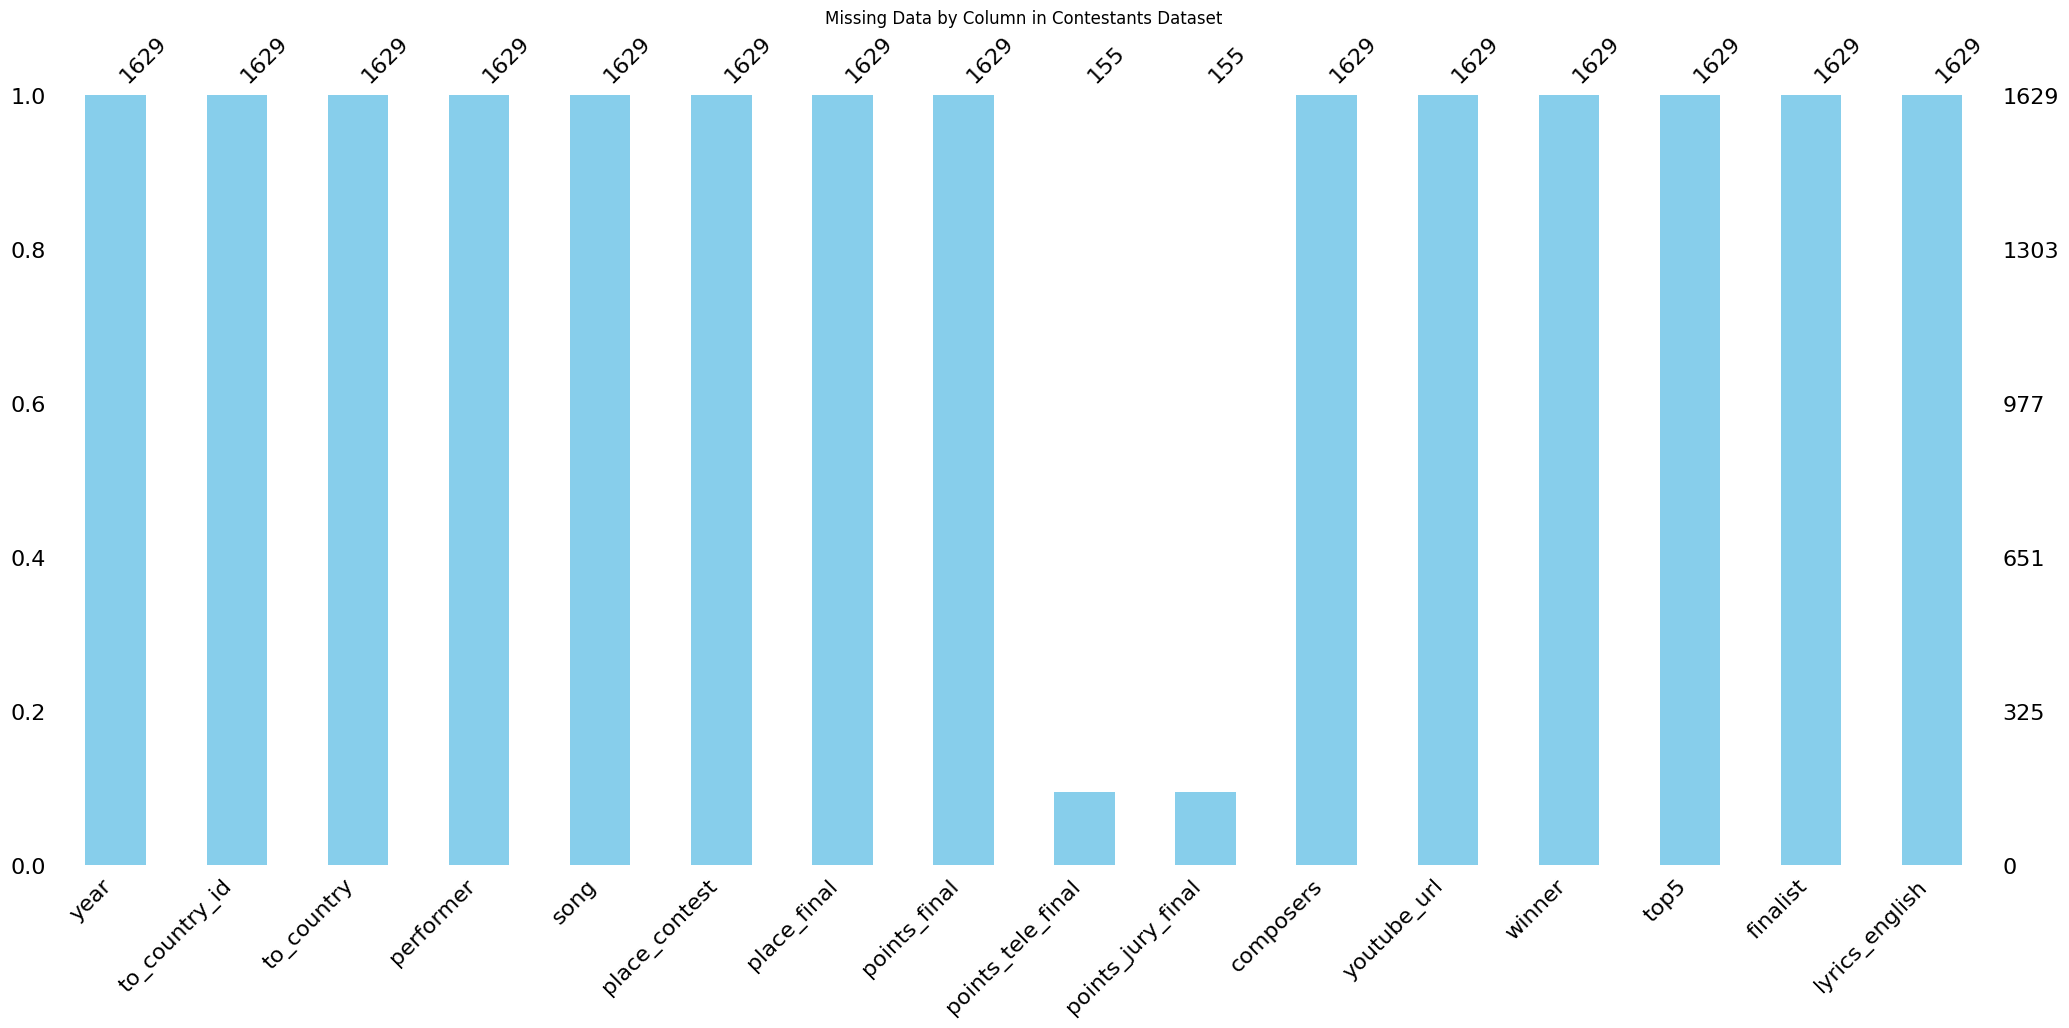

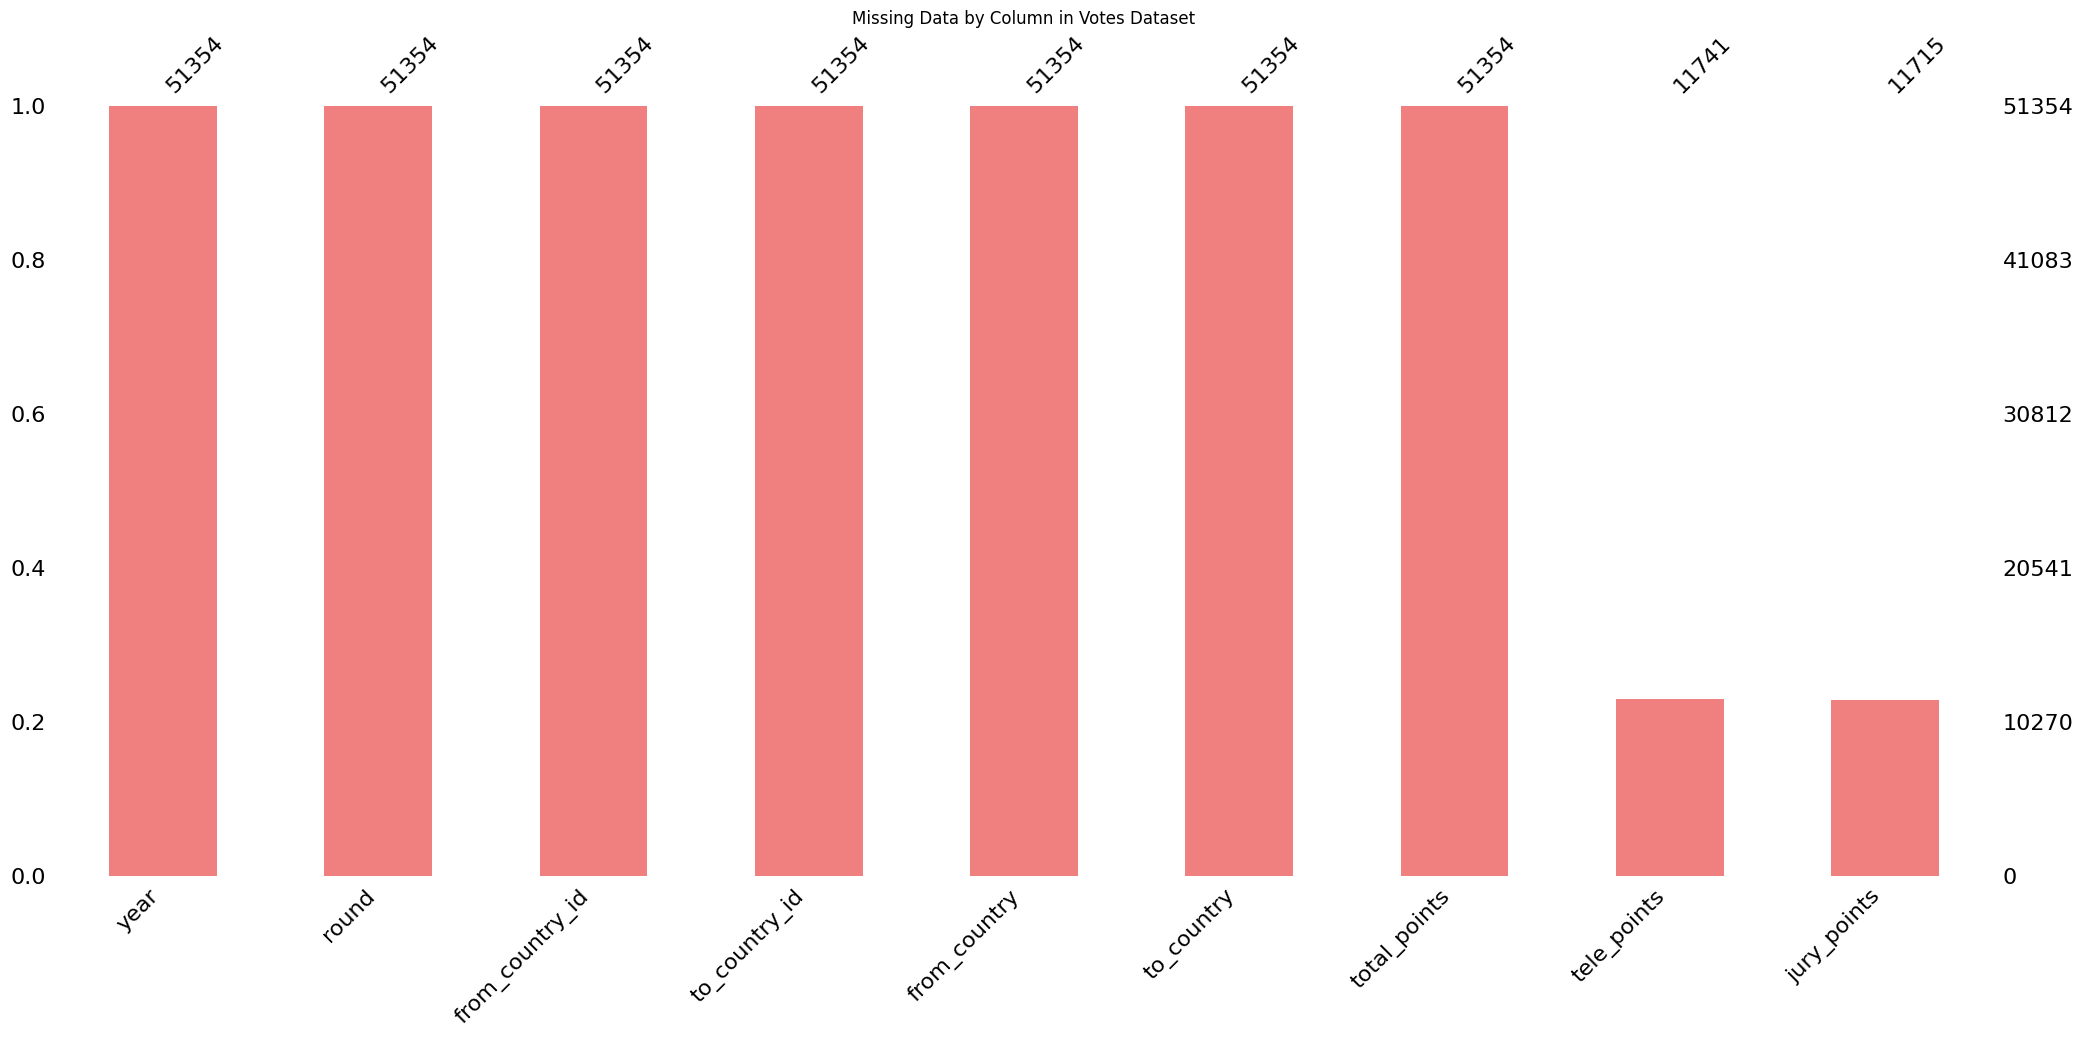

<Figure size 1000x600 with 0 Axes>

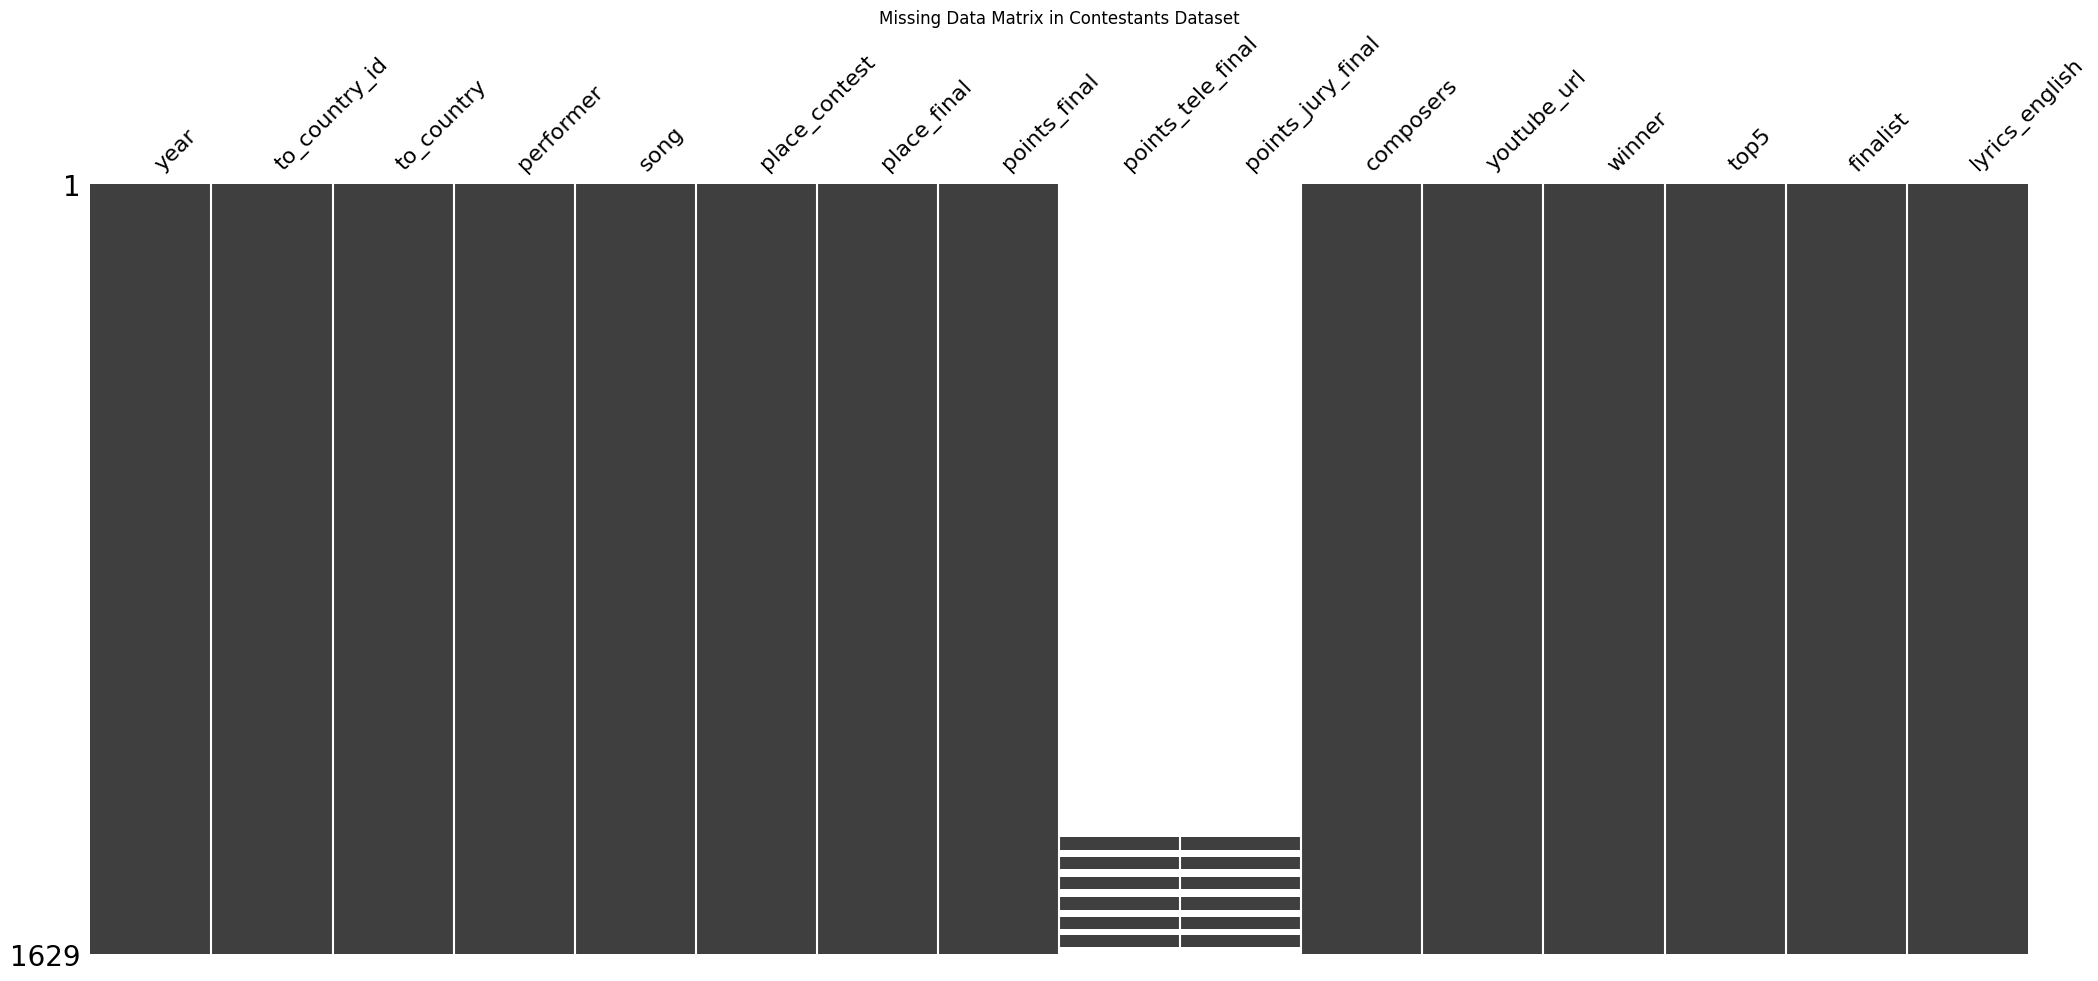

<Figure size 1000x600 with 0 Axes>

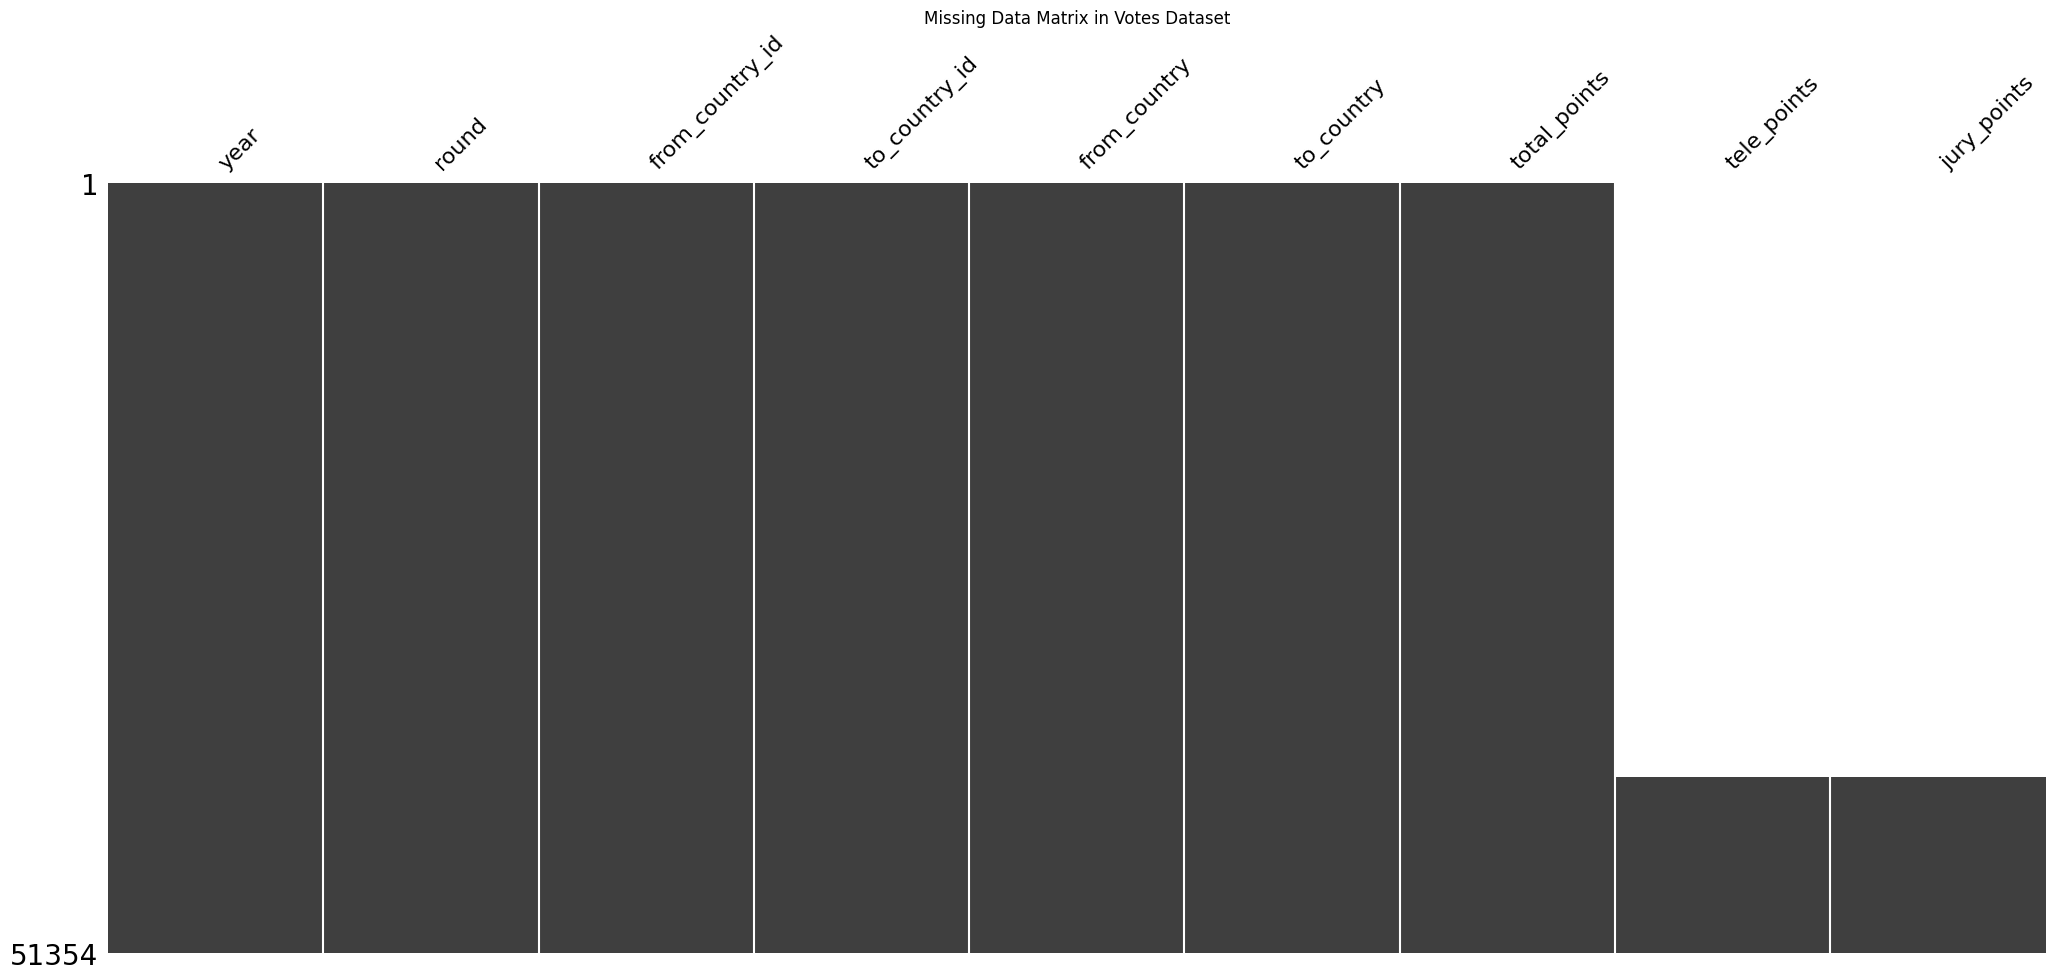

In [162]:
# Summary of missing data for both datasets
def display_missing_data_info(df, df_name):
    print(f"\nMissing data summary for {df_name}:")
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    print(missing_data)
    missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)
    print(f"\nPercentage of missing values in {df_name}:")
    print(missing_percentage)

# Display missing data info
display_missing_data_info(contestant_df, "Contestants Dataset")
display_missing_data_info(vote_df, "Votes Dataset")

# Visualize missing data with bar charts
plt.figure(figsize=(10, 6))
msno.bar(contestant_df, color='skyblue')
plt.title("Missing Data by Column in Contestants Dataset")
plt.show()

plt.figure(figsize=(10, 6))
msno.bar(vote_df, color='lightcoral')
plt.title("Missing Data by Column in Votes Dataset")
plt.show()

# Matrix plot for detailed pattern
plt.figure(figsize=(10, 6))
msno.matrix(contestant_df, sparkline=False)
plt.title("Missing Data Matrix in Contestants Dataset")
plt.show()

plt.figure(figsize=(10, 6))
msno.matrix(vote_df, sparkline=False)
plt.title("Missing Data Matrix in Votes Dataset")
plt.show()


### Thought Process

*Data cleanup*
First lets fix the 3 missing song names. The songs names are just the same as the name of the artist. 

That place_contestant has some missing values is unexpected, and all seem to appear at the same time lets investigate. It concerns the years 2020 and 2023. 
2020 was canceled due to Covid and 2023 was probably not yet finished when the dataset got created. the two years will be removed. The year 1956 is also removed as no rating was publish and the data is also not included in the votes dataset. So the dataset holds from 1957 to 2022 excluding 2020.

What data do we actually need? we will keep the following and drop the rest:
- year
- to_country_id
- to_country
- performer
- song
- points_tele_final	
- points_jury_final	
- youtube_url

Dropped and reason:
- sf_num: No need to know about semifinals
- running_final: No need to know about broadcast order (who performs when)
- running_sf: No need to know about broadcast order (who performs when)
- place_sf: No interest in Semifinal
- points_sf: No interest in Semifinal
- points_tele_sf: No interest in Semifinal
- points_jury_sf: No interest in Semifinal
- Lyrics: We added our own
- lyricists: No interest

Next lets look at data instances that have missing place final. 
With the introduction of Semifinals starting in 2004, there can be countries that dont qualify through the semifinal. For these the place_final was missing and will be changed to non-qualified. 

Now the missing point_final. For the first contest in 1956 there was no rating published. Other than that it seems that the dataset just does not contain the points of contestants that didn't qualify. Also, with the introduction of semifinals and thus having countries not qualify, the unqualified countries become uninteresting. 

Missing Youtube Urls have been added manually. 

Lyrics have been scraped from the https://eurovisionworld.com/ website. 

Composers have been manually added. If there was no composer available the songwriters were chosen instead.


*Adding of new columns*
One hot encoding for the view.


*Outliers*
Change Country of czechia and North macedonia to have consistency. Also with the introduction of Semifinals, the countries that didn't qualify still had their coutry name in the to_country_id column. This has been changed. 


In [15]:
# Fix missing Song Titles
contestant_df['song'].fillna(contestant_df['performer'], inplace=True)


#Remove countries from 2020 and 2023
contestant_df = contestant_df[~contestant_df['year'].isin([1956, 2020, 2023])]


# List of columns to drop
columns_to_drop = [
    'sf_num', 'running_final', 'running_sf', 
    'place_sf', 'points_sf', 'points_tele_sf', 'points_jury_sf', 'lyricists', 'lyrics'
]


# Drop the specified columns
contestant_df = contestant_df.drop(columns=columns_to_drop)


# Filter rows where 'place_final' is NaN (indicating the country didn't qualify)
non_qualified = contestant_df[contestant_df['place_final'].isna()]
# Count occurrences of each 'place_contest' value for non-qualified countries
place_counts = non_qualified['place_contest'].value_counts().sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(place_counts.index, place_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Place Contest')
plt.ylabel('Number of Non-Qualified Countries')
plt.title('Distribution of Contest Places for Non-Qualified Countries')
plt.show()
# Replace NaN values in the 'place_contest' column with "Non-Qualified"
contestant_df['place_final'].fillna('non-qualified', inplace=True)


# Replace NaN values in 'points_final' with "not_qualified"
contestant_df.loc[(contestant_df['points_final'].isna()), 'points_final'] = 'not_qualified'


# Create the 'winner' column: 1 if 'place_contest' is 1, otherwise 0
contestant_df['winner'] = contestant_df['place_contest'].apply(lambda x: 1 if x == 1 else 0)
# Create 'top5' column: 1 if 'place_contest' is between 1 and 5, otherwise 0
contestant_df['top5'] = contestant_df['place_contest'].apply(lambda x: 1 if 1 <= x <= 5 else 0)
# Create 'finalist' column: 1 if 'place_final' is not 'non-qualified', otherwise 0
contestant_df['finalist'] = contestant_df['place_final'].apply(lambda x: 0 if x == 'non-qualified' else 1)


# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df['to_country'] = contestant_df['to_country'].replace('Czechia', 'Czech Republic')
# Replace 'Czechia' with 'Czech Republic' in the 'to_country' column
contestant_df['to_country'] = contestant_df['to_country'].replace('North MacedoniaN.Macedonia', 'North Macedonia')



# Dictionary mapping country names to their corresponding codes
country_code_mapping = {
    'Switzerland': 'ch', 'North Macedonia': 'mk', 'Latvia': 'lv', 
    'Slovenia': 'si', 'Belarus': 'by', 'Belgium': 'be', 'Montenegro': 'me',
    'Portugal': 'pt', 'Estonia': 'ee', 'Netherlands': 'nl', 'Poland': 'pl', 
    'San Marino': 'sm', 'Finland': 'fi', 'Ireland': 'ie', 'Bulgaria': 'bg', 
    'Malta': 'mt', 'Iceland': 'is', 'Lithuania': 'lt', 'Albania': 'al',
    'Croatia': 'hr', 'Cyprus': 'cy', 'Israel': 'il', 'Andorra': 'ad', 
    'Austria': 'at', 'Moldova': 'md', 'Czech Republic': 'cz', 'Georgia': 'ge', 
    'Slovakia': 'sk', 'Denmark': 'dk', 'Hungary': 'hu', 'Armenia': 'am', 
    'Monaco': 'mc', 'Norway': 'no', 'Serbia': 'rs', 'Romania': 'ro', 
    'Greece': 'gr', 'Sweden': 'se', 'Turkey': 'tr', 'Bosnia & Herzegovina': 'ba', 
    'Azerbaijan': 'az', 'Russia': 'ru'
}

# Replace country names in the 'to_country_id' column with corresponding codes
contestant_df['to_country_id'] = contestant_df['to_country_id'].replace(country_code_mapping)


# Example of adding a URL based on conditions
country_id = 'cy'
contestant_df.loc[(contestant_df['year'] == 2022) & (contestant_df['to_country_id'] == country_id), 'youtube_url'] = 'https://youtu.be/W2IUdTl-gAI'

# --------------SCRAPPER-------------------------------------
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time
# import random
# 
# def get_lyrics(year, country_name):
#     url = f"https://eurovisionworld.com/eurovision/{year}/{country_name}"
#     print(f"Fetching URL: {url}")
#     
#     # Headers to mimic a real browser request
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
#         'Accept-Language': 'en-US,en;q=0.9',
#     }
#     
#     # Make the request
#     response = requests.get(url, headers=headers)
#     
#     if response.status_code == 200:
#         soup = BeautifulSoup(response.text, 'html.parser')
#         
#         # Try multiple selectors to find the English lyrics section
#         possible_selectors = [
#             ('div', {'class': 'lyrics_div lyr_div lyr_desktop', 'data-lyrics-language': "1"}),
#             ('div', {'class': 'lyrics_div lyr_div', 'data-lyrics-language': "1"}),
#             ('div', {'class': 'lyrics_div_wrap mm'}),
#         ]
#         
#         lyrics_div = None
#         for tag, attrs in possible_selectors:
#             lyrics_div = soup.find(tag, attrs)
#             if lyrics_div:
#                 print(f"English lyrics section found with selector: {tag}, {attrs}")
#                 break
#         
#         if lyrics_div:
#             # Extract lyrics text, handling <p> and <br> tags
#             lyrics_lines = []
#             for paragraph in lyrics_div.find_all('p'):
#                 line_text = paragraph.get_text(separator="\n").strip()
#                 lyrics_lines.append(line_text)
#             return "\n".join(lyrics_lines)
#         else:
#             print("English lyrics section not found; trying alternative selectors.")
#             for tag, attrs in possible_selectors[1:]:  # Skip first, as it’s already tried
#                 lyrics_div = soup.find(tag, attrs)
#                 if lyrics_div:
#                     print(f"Fallback lyrics section found with selector: {tag}, {attrs}")
#                     lyrics_lines = []
#                     for paragraph in lyrics_div.find_all('p'):
#                         line_text = paragraph.get_text(separator="\n").strip()
#                         lyrics_lines.append(line_text)
#                     return "\n".join(lyrics_lines)
#             print("No lyrics found after trying all selectors.")
#     else:
#         print(f"Failed to fetch page: {response.status_code}")
#     return None
# 
# 
# # Loop through each sampled row to fetch lyrics with progress tracking
# sampled_lyrics_data = []
# total_rows = len(contestant_df)
# for index, row in contestant_df.iterrows():
#     year = row['year']
#     country_name = row['to_country'].lower().replace(" ", "-")  # Format for URL
#     
#     # Get lyrics and handle any exceptions
#     try:
#         lyrics = get_lyrics(year, country_name)
#         sampled_lyrics_data.append(lyrics)
#         print(f"Lyrics fetched for {year} {country_name} [{index + 1}/{total_rows}]")
#     except Exception as e:
#         print(f"Failed to fetch lyrics for {year} {country_name} [{index + 1}/{total_rows}]: {e}")
#     
#     # Wait to avoid overloading the server
#     time.sleep(random.uniform(0.5, 0.8))
# 
# # Add the fetched lyrics data to the DataFrame
# contestant_df['lyrics_english'] = sampled_lyrics_data
# ---------------------------------------------------



C:\Users\mikej\AppData\Local\Temp\ipykernel_7576\829850799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  contestant_df['song'].fillna(contestant_df['performer'], inplace=True)


,year,to_country_id,to_country,performer,song,place_contest,place_final,points_final,points_tele_final,points_jury_final,composers,youtube_url,winner,top5,finalist,lyrics_english


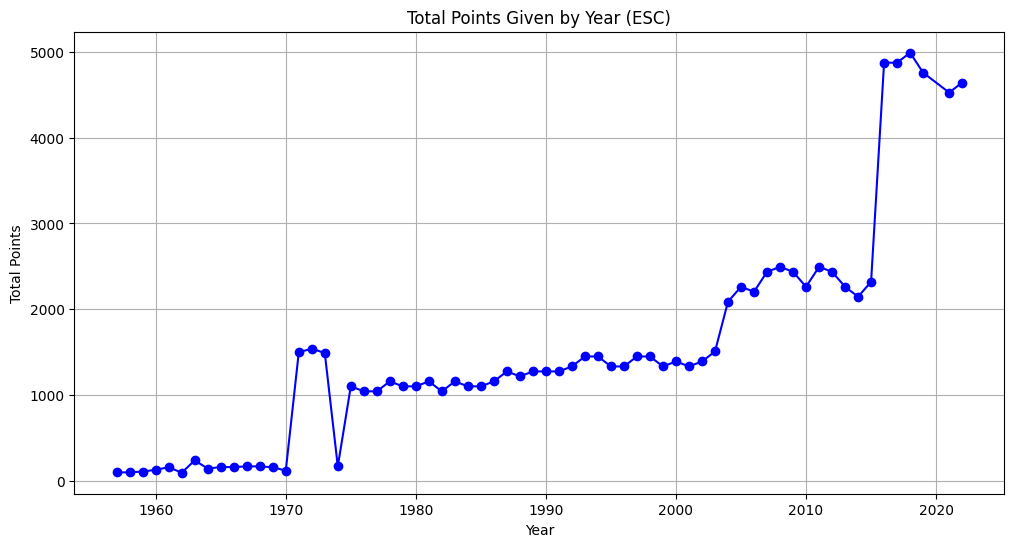

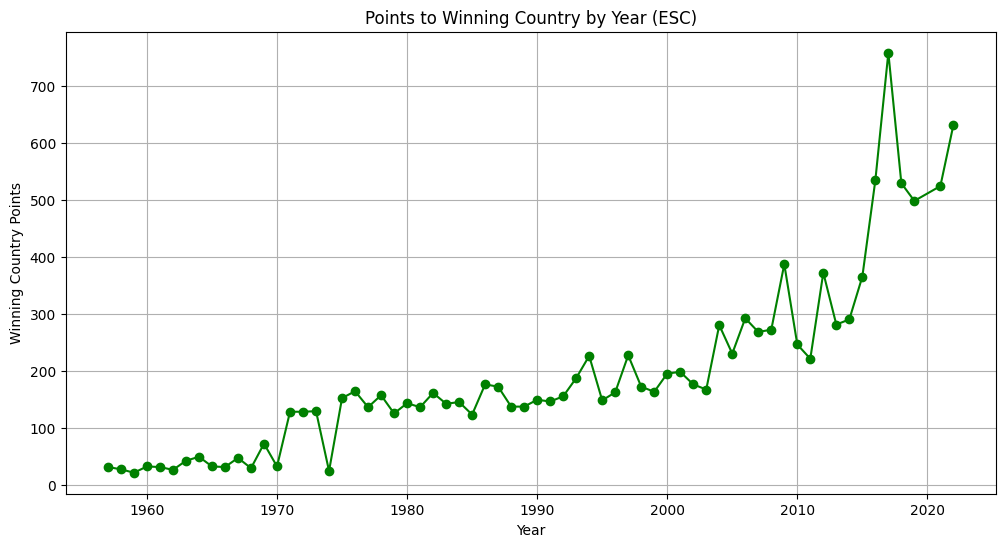

In [14]:


# Clean the points_final column to ensure it contains only numeric values
contestant_df['points_final'] = pd.to_numeric(contestant_df['points_final'], errors='coerce')
esc_data_cleaned = contestant_df.dropna(subset=['points_final'])

# Calculate yearly statistics: sum of points given and points received by the winning country
yearly_points = esc_data_cleaned.groupby('year')['points_final'].sum()
winning_points = esc_data_cleaned.loc[esc_data_cleaned['place_final'] == '1.0'].groupby('year')['points_final'].sum()

# Plot for Total Points Given by Year
plt.figure(figsize=(12, 6))
plt.plot(yearly_points.index, yearly_points.values, label="Total Points Given", color='blue', marker='o')
plt.title("Total Points Given by Year (ESC)")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

# Plot for Points to Winning Country by Year
plt.figure(figsize=(12, 6))
plt.plot(winning_points.index, winning_points.values, label="Points to Winning Country", color='green', marker='o')
plt.title("Points to Winning Country by Year (ESC)")
plt.xlabel("Year")
plt.ylabel("Winning Country Points")
plt.grid(True)
plt.show()


# Contestant Dataset

In [4]:
for i in range(len(contestant_df.columns)):
    column = contestant_df.columns[i]
    print(f'{column} : {np.sort(contestant_df[column].dropna().unique())}')
    print('--------------------------------------------------')


print(contestant_df.shape)
print(contestant_df.columns)
contestant_df.head()

year : [1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
--------------------------------------------------
to_country_id : ['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'Georgia' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Latvia' 'Lithuania' 'Malta'
 'Moldova' 'Monaco' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Russia' 'San Marino' 'Serbia' 'Slovakia'
 'Slovenia' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'al' 'am' 'at' 'au'
 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz' 'de' 'dk' 'ee' 'es' 'fi'
 'fr' 'gb' '

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [5]:
contestant_df[contestant_df['year'] == 1956]

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI
5,1956,lu,Luxembourg,Michèle Arnaud,Ne Crois Pas,2.0,NaN,13.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Christian Guitreau,NaN,Si on te dit qu't'a une belle gueule\nY a pas ...,https://youtube.com/watch?v=Pv7GJkqtNuc
6,1956,it,Italy,Franca Raimondi,Aprite Le Finestre,2.0,NaN,7.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Virgilio Panzuti,Pinchi,La prima rosa rossa è già sbocciata\nE nascon ...,https://youtube.com/watch?v=HHA1mC2RkKc
7,1956,nl,Netherlands,Corry Brokken,Voorgoed Voorbij,2.0,NaN,8.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jelle de Vries,NaN,Voorgoed voorbij\nNu zijn we nooit meer samen\...,https://youtube.com/watch?v=6OjNzLaifFM
8,1956,be,Belgium,Mony Marc,Le Plus Beau Jour De Ma Vie,2.0,NaN,10.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Claude Alix,David Bee,Les cloches sonnent\nTout carillonne\nLe plus ...,https://youtube.com/watch?v=dL139DezFwo
9,1956,de,Germany,Freddy Quinn,So Geht Das Jede Nacht,2.0,NaN,11.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Lothar Olias,Peter Mösser,"Am Sonntag mit Jimmy, am Montag mit Jack\nAm D...",https://youtube.com/watch?v=DJFGwPVKfyk


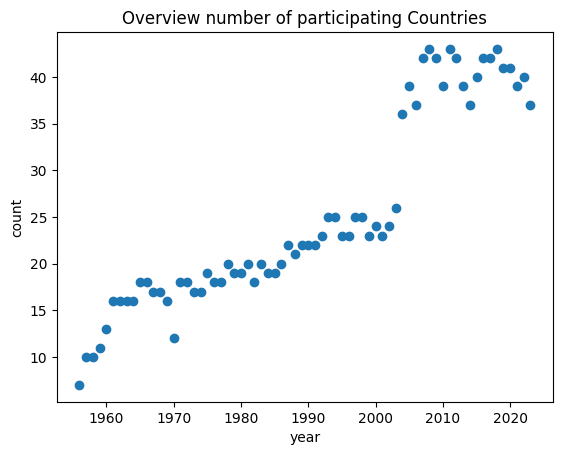

In [9]:

yearly_category_count = contestant_df.groupby('year')['to_country'].nunique().reset_index()
yearly_category_count.columns = ['year', 'count']

yearly_category_count

plt.figure()
plt.scatter(yearly_category_count['year'], yearly_category_count['count'],)
plt.xlabel('year')
plt.ylabel('count')
plt.title("Overview number of participating Countries")
plt.show()

# import plotly.express as px

# # Create a bar chart
# fig = px.bar(yearly_category_count, x='Year', y='Category_Count',
#              title='Number of Categories by Year',
#              labels={'Category_Count': 'Number of Categories', 'Year': 'Year'})

# fig.show()



In [7]:
yearly_category_count

,year,count
0,1956,7
1,1957,10
2,1958,10
3,1959,11
4,1960,13
...,...,...
63,2019,41
64,2020,41
65,2021,39
66,2022,40


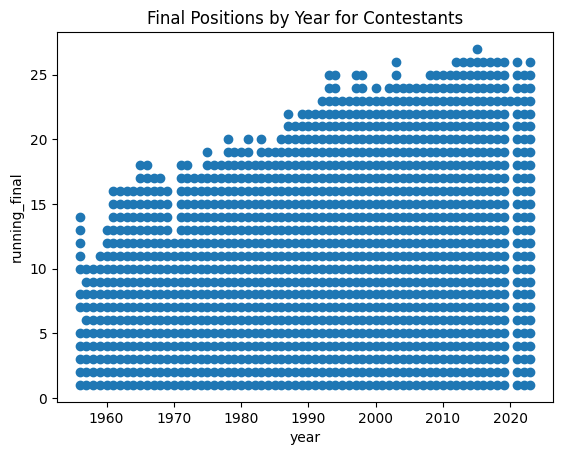

In [10]:
x_val = 'year'
y_val = 'running_final'

plt.figure()
plt.scatter(contestant_df[x_val], contestant_df[y_val],)
plt.xlabel(x_val)
plt.ylabel(y_val)
plt.title("Final Positions by Year for Contestants")

plt.show()

# Votes Dataset

In [11]:
print(vote_df.shape)
for i in range(len(vote_df.columns)):
    column = vote_df.columns[i]
    print(f'{column} : {np.sort(vote_df[column].dropna().unique())}')
    print('--------------------------------------------------')


vote_df.tail()

(51354, 9)
year : [1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2021 2022 2023]
--------------------------------------------------
round : ['final' 'semi-final' 'semi-final-1' 'semi-final-2']
--------------------------------------------------
from_country_id : ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 'ie' 'il' 'is'
 'it' 'lt' 'lu' 'lv' 'ma' 'mc' 'md' 'me' 'mk' 'mt' 'nl' 'no' 'pl' 'pt'
 'ro' 'rs' 'ru' 'se' 'si' 'sk' 'sm' 'tr' 'ua' 'wld' 'yu']
--------------------------------------------------
to_country_id : ['ad' 'al' 'am' 'at' 'au' 'az' 'ba' 'be' 'bg' 'by' 'ch' 'cs' 'cy' 'cz'
 'de' 'dk' 'ee' 'es' 'fi' 'fr' 'gb' 'ge' 'gr' 'hr' 'hu' 

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
51349,2023,final,wld,al,wld,al,6,6.0,NaN
51350,2023,final,wld,pt,wld,pt,0,0.0,NaN
51351,2023,final,wld,rs,wld,rs,0,0.0,NaN
51352,2023,final,wld,gb,wld,gb,0,0.0,NaN
51353,2023,final,wld,de,wld,de,0,0.0,NaN


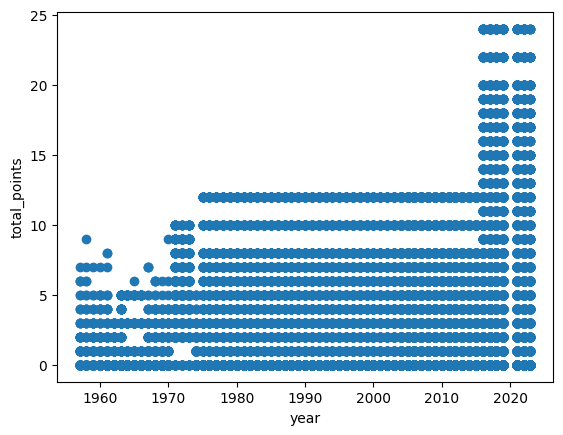

In [12]:
x_val = 'year'
y_val = 'total_points'

plt.figure()
plt.scatter(vote_df[x_val], vote_df[y_val],)
plt.xlabel(x_val)
plt.ylabel(y_val)
plt.title("Total Points by Year") 
plt.show()

In [13]:
vote_df[vote_df['year'] < 1980]

,year,round,from_country_id,to_country_id,from_country,to_country,total_points,tele_points,jury_points
0,1957,final,at,nl,at,nl,6,NaN,NaN
1,1957,final,at,fr,at,fr,0,NaN,NaN
2,1957,final,at,dk,at,dk,0,NaN,NaN
3,1957,final,at,lu,at,lu,3,NaN,NaN
4,1957,final,at,de,at,de,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6131,1979,final,gb,it,gb,it,0,NaN,NaN
6132,1979,final,gb,mc,gb,mc,0,NaN,NaN
6133,1979,final,gb,se,gb,se,0,NaN,NaN
6134,1979,final,gb,be,gb,be,2,NaN,NaN


In [16]:
import pandas as pd

# Sample data
data = {
    'Voter': ['Voter1', 'Voter1', 'Voter2', 'Voter2', 'Voter3', 'Voter3'],
    'Subject': ['Subject1', 'Subject2', 'Subject1', 'Subject2', 'Subject1', 'Subject2'],
    'Score': [3, 5, 4, 1, 2, 4]
}
df = pd.DataFrame(data)

# Pivot the data to get a Voter-Subject matrix
pivot_df = df.pivot(index='Voter', columns='Subject', values='Score').fillna(0)
print(pivot_df)


Subject  Subject1  Subject2
Voter                      
Voter1          3         5
Voter2          4         1
Voter3          2         4


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px

# Sample data
data = {
    'Voter': ['Voter1', 'Voter1', 'Voter2', 'Voter2', 'Voter3', 'Voter3'],
    'Subject': ['Subject1', 'Subject2', 'Subject1', 'Subject2', 'Subject1', 'Subject2'],
    'Score': [3, 5, 4, 1, 2, 4]
}
df = pd.DataFrame(data)

# Pivot the data to get a Voter-Subject matrix
pivot_df = df.pivot(index='Voter', columns='Subject', values='Score').fillna(0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
pivot_df['Cluster'] = kmeans.fit_predict(pivot_df)

# Merge cluster labels with the original data
df = df.merge(pivot_df['Cluster'], on='Voter', how='left')

# Plot with marker size based on 'Score'
fig = px.scatter(df, x='Subject', y='Voter', color='Cluster', size='Score',
                 title="Clustering of Voters with Scores Represented by Marker Size",
                 labels={'Score': 'Score', 'Cluster': 'Cluster'},
                 size_max=20)  # size_max controls the maximum marker size

fig.show()


c:\Users\terra\Documents\UZH_doc\2024_2H\Interactive_Visual_Data_Analysis\IVDA_project\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
!pip install --upgrade nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.20.0-py3-none-any.whl (23 kB)
Using cached jsonschema-4.23.0-py3-none-any.whl (88 kB)
Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
